<h3 style='color:blue' align='center'>Customer Churn Prediction Using Artificial Neural Network (ANN)</h3>

Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

**Load the data**

In [2]:
df = pd.read_csv("..\Data\customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2059,7483-IQWIB,Male,0,Yes,Yes,37,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,92.95,3415.25,No
573,4710-FDUIZ,Male,0,Yes,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,One year,No,Credit card (automatic),100.30,5614.45,Yes
1991,0607-MVMGC,Male,0,Yes,Yes,45,Yes,Yes,DSL,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),78.75,3600.65,No
3979,7008-LZVOZ,Male,0,Yes,Yes,66,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),25.30,1672.35,No
1147,0411-EZJZE,Female,0,No,No,3,Yes,Yes,DSL,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,60.25,170.5,No


**First of all, drop customerID column as it is of no use**

In [3]:
df.drop('customerID',axis='columns',inplace=True)

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**Remove rows with space in TotalCharges**

In [5]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [6]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\abhui\Anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [7]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

**Many of the columns are yes, no etc. Let's print unique values in object columns to see data values**

In [8]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [9]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Some of the columns have no internet service or no phone service, that can be replaced with a simple No**

In [10]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\abhui\Anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\frame.py:4521: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [11]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


**Convert Yes and No to 1 or 0**

In [12]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\abhui\Anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\series.py:4506: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [13]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [14]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [15]:
df1.gender.unique()

array([1, 0], dtype=int64)

**One hot encoding for categorical columns**

In [16]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [17]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5975,0,0,1,1,7,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1877,0,0,0,0,72,1,1,1,1,1,...,1,0,0,0,0,1,0,1,0,0
4075,0,0,0,0,53,0,0,1,1,0,...,1,0,0,1,0,0,1,0,0,0
3342,0,0,0,0,40,0,0,1,1,1,...,1,0,0,0,1,0,0,1,0,0
1506,0,0,1,0,68,0,0,1,0,1,...,1,0,0,0,0,1,1,0,0,0


In [18]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [19]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

**Train test split**

In [20]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

**Build a model (ANN) in tensorflow/keras**

In [21]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4026 - accuracy: 0.8082
Epoch 2/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4000 - accuracy: 0.8110
Epoch 3/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3996 - accuracy: 0.8117
Epoch 4/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3983 - accuracy: 0.8107
Epoch 5/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3981 - accuracy: 0.8130
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3955 - accuracy: 0.8132
Epoch 7/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3948 - accuracy: 0.8140
Epoch 8/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3936 - accuracy: 0.8153
Epoch 9/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3922 - accuracy: 0.8165
Epoch 10/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3931 - accura

176/176 [==============================] - 1s 6ms/step - loss: 0.3493 - accuracy: 0.8393
Epoch 82/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3466 - accuracy: 0.8398
Epoch 83/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3484 - accuracy: 0.8398
Epoch 84/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3465 - accuracy: 0.8398
Epoch 85/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3453 - accuracy: 0.8421
Epoch 86/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3453 - accuracy: 0.8386
Epoch 87/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3467 - accuracy: 0.8420
Epoch 88/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3448 - accuracy: 0.8418: 0s - l
Epoch 89/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3467 - accuracy: 0.8398
Epoch 90/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3455 - ac

In [25]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.5203 - accuracy: 0.7569


[0.5203344225883484, 0.7569296360015869]

In [26]:
yp = model.predict(X_test)
yp[:5]

array([[0.04897968],
       [0.40815902],
       [0.01491981],
       [0.567431  ],
       [0.3659011 ]], dtype=float32)

In [27]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [28]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [29]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [30]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       999
           1       0.62      0.42      0.50       408

    accuracy                           0.76      1407
   macro avg       0.71      0.66      0.67      1407
weighted avg       0.74      0.76      0.74      1407



Text(69.0, 0.5, 'Truth')

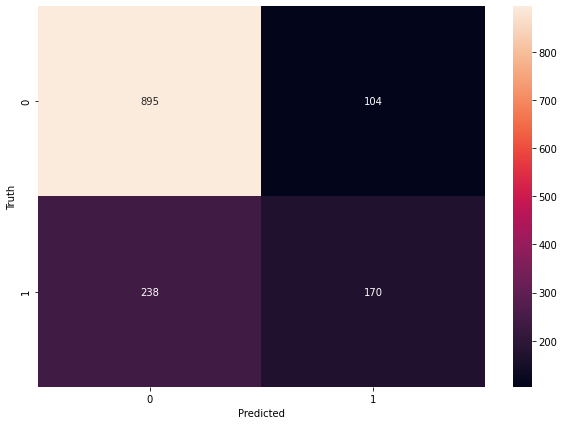

In [31]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')